In [17]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(10, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


# Registers to edit - least significant digit
# circuit.x(qreg_q[0])
# circuit.x(qreg_q[1])

# Registers to edit - second least significant digit
circuit.x(qreg_q[4])
circuit.x(qreg_q[5])

# Registers to edit - third least significant digit
circuit.x(qreg_q[7])
circuit.x(qreg_q[8])

# Digit 1 - 0
# Digit 2 - 1
# Carry in/Sum - 2
# Carry out - 3
d1 = 0
d2 = 1
s = 2
cOut = 3
circuit.ccx(qreg_q[d1], qreg_q[d2], qreg_q[cOut])
circuit.cx(qreg_q[d1], qreg_q[d2])
circuit.ccx(qreg_q[d2], qreg_q[s], qreg_q[cOut])
circuit.cx(qreg_q[d2], qreg_q[s])
circuit.cx(qreg_q[d1], qreg_q[d2])


# Digit 1 - 4
# Digit 2 - 5
# Carry in/Sum - 3
# Carry out - 6
d1 = 4
d2 = 5
s = 3
cOut = 6
circuit.ccx(qreg_q[d1], qreg_q[d2], qreg_q[cOut])
circuit.cx(qreg_q[d1], qreg_q[d2])
circuit.ccx(qreg_q[d2], qreg_q[s], qreg_q[cOut])
circuit.cx(qreg_q[d2], qreg_q[s])
circuit.cx(qreg_q[d1], qreg_q[d2])

# Digit 1 - 7
# Digit 2 - 8
# Carry in/Sum - 6
# Carry out - 9
d1 = 7
d2 = 8
s = 6
cOut = 9
circuit.ccx(qreg_q[d1], qreg_q[d2], qreg_q[cOut])
circuit.cx(qreg_q[d1], qreg_q[d2])
circuit.ccx(qreg_q[d2], qreg_q[s], qreg_q[cOut])
circuit.cx(qreg_q[d2], qreg_q[s])
circuit.cx(qreg_q[d1], qreg_q[d2])

circuit.measure(qreg_q[9], creg_c[3])
circuit.measure(qreg_q[6], creg_c[2])
circuit.measure(qreg_q[3], creg_c[1])
circuit.measure(qreg_q[2], creg_c[0])

print(circuit)

                                                 
q_0: ──■────■──────────────■─────────────────────
       │  ┌─┴─┐          ┌─┴─┐                   
q_1: ──■──┤ X ├──■────■──┤ X ├───────────────────
       │  └───┘  │  ┌─┴─┐└───┘┌─┐                
q_2: ──┼─────────■──┤ X ├─────┤M├────────────────
     ┌─┴─┐     ┌─┴─┐└───┘┌───┐└╥┘     ┌─┐        
q_3: ┤ X ├─────┤ X ├──■──┤ X ├─╫──────┤M├────────
     ├───┤     └───┘  │  └─┬─┘ ║      └╥┘        
q_4: ┤ X ├──■────■────┼────┼───╫───■───╫─────────
     ├───┤  │  ┌─┴─┐  │    │   ║ ┌─┴─┐ ║         
q_5: ┤ X ├──■──┤ X ├──■────■───╫─┤ X ├─╫─────────
     └───┘┌─┴─┐└───┘┌─┴─┐      ║ ├───┤ ║      ┌─┐
q_6: ─────┤ X ├─────┤ X ├──■───╫─┤ X ├─╫──────┤M├
     ┌───┐└───┘     └───┘  │   ║ └─┬─┘ ║      └╥┘
q_7: ┤ X ├──■────■─────────┼───╫───┼───╫───■───╫─
     ├───┤  │  ┌─┴─┐       │   ║   │   ║ ┌─┴─┐ ║ 
q_8: ┤ X ├──■──┤ X ├───────■───╫───■───╫─┤ X ├─╫─
     └───┘┌─┴─┐└───┘     ┌─┴─┐ ║  ┌─┐  ║ └───┘ ║ 
q_9: ─────┤ X ├──────────┤ X ├─╫──┤M├──╫───────╫─


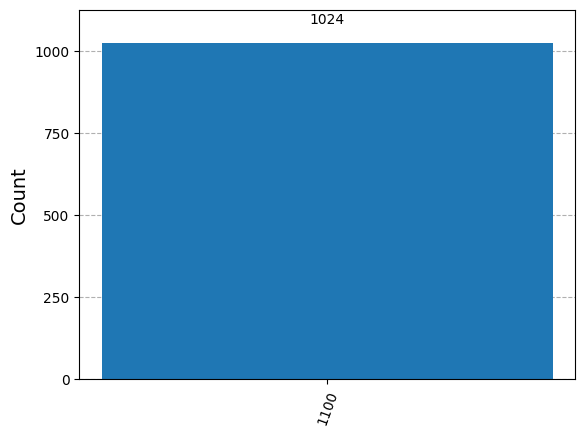

In [26]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator


simulator = AerSimulator()
circ = transpile(circuit, simulator)
# Run and get counts 
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)